### Imports and Setup 

In [439]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [440]:
data = pd.read_csv('data/clean_data.csv')

data.head(5)

,id,age,monthly_income,collateral_value,loan_amount,state,collateral_debt,verified_restriction,dishonored_checks,expired_debts,...,pre_approved,form_completed,sent_to_analysis,channel,zip_code,landing_page,landing_page_product,gender,utm_term,education_level
0,173460,52,5668.0,24000.0,5000.0,SP,900.0,0.0,0,0,...,1,0,0,search,4028XXXX,/emprestimos/solicitar,PersonalLoan,female,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
1,173455,20,5000.0,14200.0,5000.0,SP,1500.0,0.0,0,0,...,1,0,0,direct,7060XXXX,/emprestimos,NaN,male,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
2,173450,48,3000.0,17000.0,8000.0,AM,1060.0,0.0,0,0,...,1,0,0,affiliates,6906XXXX,/emprestimos/garantia-veiculo/solicitar,NaN,male,NaN,Educação superior completa
3,173442,56,7500.0,21000.0,12000.0,BA,0.0,1.0,0,0,...,1,0,0,social,4536XXXX,/emprestimos/solicitar,PersonalLoan,male,NaN,NaN
4,173437,35,3379.0,16500.0,5000.0,SP,0.0,0.0,0,0,...,1,0,0,search,8588XXXX,/emprestimos/solicitar,PersonalLoan,male,NaN,"Ensino médio completo (antigo 2º grau, secundá..."


### Univariate Visualization

Lets start our exploratory analysis looking into isolated features with the objective to get a deep knowladge about your distribution.

<b>Numerical features</b>

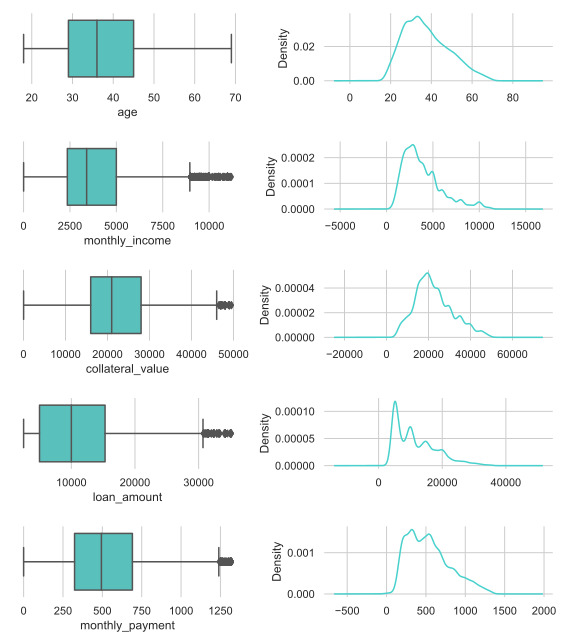

In [441]:
fig = plt.figure(figsize=(9,10))

ax1 = fig.add_subplot(5, 2, 1)
sns.boxplot(data['age'], color="mediumturquoise")

fig.add_subplot(5, 2, 2)
data['age'].plot(kind='density', color='mediumturquoise')

fig.add_subplot(5, 2, 3)
sns.boxplot(data['monthly_income'], color='mediumturquoise')

fig.add_subplot(5, 2, 4)
data['monthly_income'].plot(kind='density', color='mediumturquoise')  

fig.add_subplot(5, 2, 5)
sns.boxplot(data['collateral_value'], color='mediumturquoise')

fig.add_subplot(5, 2, 6)
data['collateral_value'].plot(kind='density', color='mediumturquoise')

fig.add_subplot(5, 2, 7)
sns.boxplot(data['loan_amount'], color='mediumturquoise')

fig.add_subplot(5, 2, 8)
data['loan_amount'].plot(kind='density', color='mediumturquoise')

fig.add_subplot(5, 2, 9)
sns.boxplot(data['monthly_payment'], color='mediumturquoise')

fig.add_subplot(5, 2, 10)
data['monthly_payment'].plot(kind='density', color='mediumturquoise')

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
sns.despine(left=True, bottom=True)

<b> Categorical Features </b>

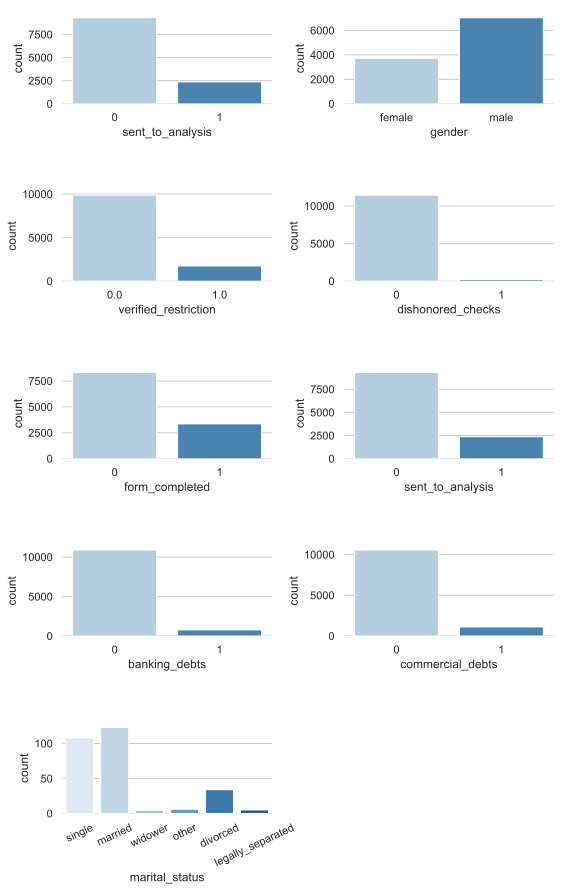

In [442]:
fig = plt.figure(figsize=(9,15))

ax1 = fig.add_subplot(6, 2, 1)
sns.countplot(x="sent_to_analysis", data=data, palette='Blues')

fig.add_subplot(6, 2, 2)
sns.countplot(x="gender", data=data, palette='Blues')

fig.add_subplot(6, 2, 3)
sns.countplot(x="verified_restriction", data=data, palette='Blues')

fig.add_subplot(6, 2, 4)
sns.countplot(x="dishonored_checks", data=data, palette='Blues')

fig.add_subplot(6, 2, 5)
sns.countplot(x="form_completed", data=data, palette='Blues')

fig.add_subplot(6, 2, 6)
sns.countplot(x="sent_to_analysis", data=data, palette='Blues')

fig.add_subplot(6, 2, 7)
sns.countplot(x="banking_debts", data=data, palette='Blues')

fig.add_subplot(6, 2, 8)
sns.countplot(x="commercial_debts", data=data, palette='Blues')

fig.add_subplot(6, 2, 9)
plt.xticks(rotation = 25)
sns.countplot(x="marital_status", data=data, palette='Blues')

sns.despine(left=True, bottom=True)

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
plt.show()

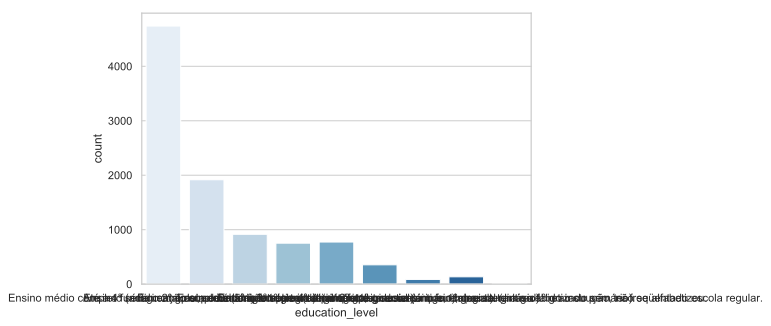

In [443]:
plt.figure(figsize=(7, 5))
sns.countplot(x="education_level", data=data, orient='v', palette='Blues')
#plt.xticks(rotation = 25)

### Multivariate Visualization

Now that we get a first look into our features we can start to see the relationship between two and more different features to get to know your correlations and get some output from it.

<b> 'sent_to_analysis' vs. Quantitative <b>

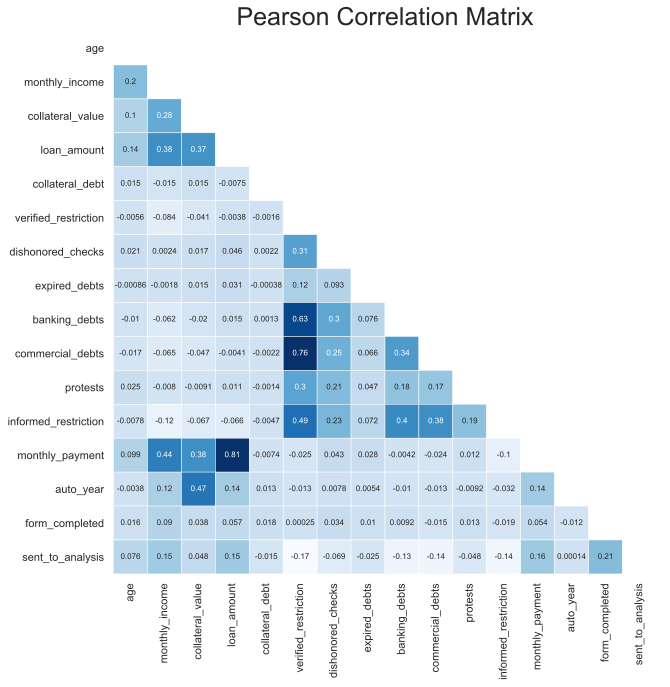

In [444]:
features = ['age', 'monthly_income', 'collateral_value', 'loan_amount', 'state', 'collateral_debt', 'verified_restriction',
       'dishonored_checks', 'expired_debts', 'banking_debts',
       'commercial_debts', 'protests', 'marital_status',
       'informed_restriction', 'monthly_payment',
       'informed_purpose', 'auto_brand', 'auto_model', 'auto_year', 'form_completed', 'sent_to_analysis', 'channel',
       'zip_code', 'landing_page', 'landing_page_product', 'gender',
       'utm_term', 'education_level']

mask = np.zeros_like(data[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation Matrix', fontsize = 25)

sns.heatmap(data[features].corr(),
            mask=mask,
            annot=True,
            linewidths=.5,
            vmax=0.7,
            square=True,
            cmap="Blues",
            linecolor="w",
            annot_kws={"size":8},
            cbar_kws={"shrink": .9},
            cbar=False)

The main focus in our EDA is to start looking the dependent feature 'sent_to_analysis' with your independent correlations.

What can we take from it starting with the quantitative independents features ?

In [445]:
numeric_features = ['age', 'monthly_income', 'collateral_value', 'loan_amount', 'monthly_payment']
column_name = data[numeric_features].columns

scaled_data = preprocessing.StandardScaler().fit_transform(data[numeric_features])
scaled_data = pd.DataFrame(scaled_data, columns=column_name)

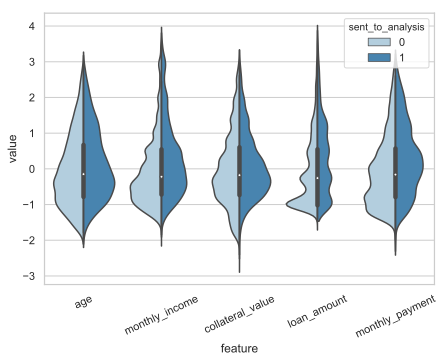

In [446]:
features = pd.concat([data[['sent_to_analysis']], scaled_data[numeric_features]], axis=1)
features = pd.melt(features, id_vars='sent_to_analysis', var_name='feature', value_name='value')

plt.figure(figsize=(7, 5))
plt.xticks(rotation = 25)
sns.violinplot(x='feature', y='value', data=features, hue='sent_to_analysis', split=True, palette='Blues')

<b> 'sent_to_analysis' vc Categorical</b>

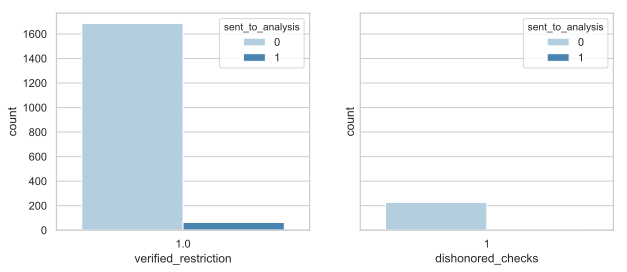

In [447]:
verified_restriction = data[data['verified_restriction'] == 1] 
categorical_features = data[data['dishonored_checks'] == 1] 

_,axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='verified_restriction', hue='sent_to_analysis', data=verified_restriction, ax=axes[0], palette='Blues');
sns.countplot(x='dishonored_checks', hue='sent_to_analysis', data=categorical_features, ax=axes[1], palette='Blues');

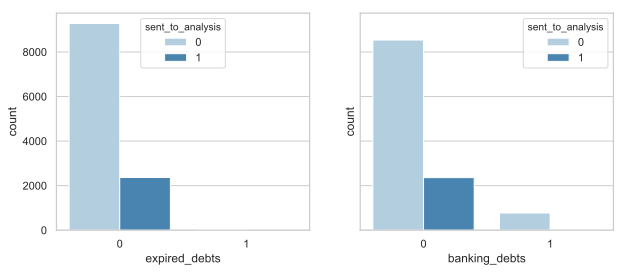

In [448]:
_,axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='expired_debts', hue='sent_to_analysis', data=data, ax=axes[0], palette='Blues');
sns.countplot(x='banking_debts', hue='sent_to_analysis', data=data, ax=axes[1], palette='Blues');

In [449]:
state = pd.crosstab(data['state'], data['sent_to_analysis']).T

In [450]:
centro_oeste = ['GO', 'DF', 'MT', 'MS']
norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
sul = ['PR', 'SC', 'RS']
nordeste = ['AL', 'BA' , 'CE', 'MA', 'PB', 'PI', 'PE', 'RN', 'SE']
sudeste = ['SP', 'MG', 'RJ']

In [451]:
data.columns

Index(['id', 'age', 'monthly_income', 'collateral_value', 'loan_amount',
       'state', 'collateral_debt', 'verified_restriction', 'dishonored_checks',
       'expired_debts', 'banking_debts', 'commercial_debts', 'protests',
       'marital_status', 'informed_restriction', 'loan_term',
       'monthly_payment', 'informed_purpose', 'auto_brand', 'auto_model',
       'auto_year', 'pre_approved', 'form_completed', 'sent_to_analysis',
       'channel', 'zip_code', 'landing_page', 'landing_page_product', 'gender',
       'utm_term', 'education_level'],
      dtype='object')